In [1]:
library(tidyverse)
library(data.table)
library(readr)
library(janitor)
library(stringr)
library(forcats)
library(lubridate)
library(naniar)
library(VIM)
library(skimr)
library(ggplot2)
library(plotly)
library(DT)
library(scales)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



Attaching package: ‘data.table’




The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year




The following objects are masked from ‘package:dplyr’:

    between, first, last




The following object is masked from ‘package:purrr’:

    transpose





Attaching package: ‘janitor’




The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




Loading required package: colorspace



Loading required package: grid



VIM is ready to use.




Suggestions and bug-reports can be submitted at: https://github.com/statistikat/VIM/issues




Attaching package: ‘VIM’




The following object is masked from ‘package:datasets’:

    sleep





Attaching package: ‘skimr’




The following object is masked from ‘package:naniar’:

    n_complete





Attaching package: ‘plotly’




The following object is masked from ‘package:ggplot2’:

    last_plot




The following object is masked from ‘package:stats’:

    filter




The following object is masked from ‘package:graphics’:

    layout




The following object is masked from ‘package:httr’:

    config





Attaching package: ‘scales’




The following object is masked from ‘package:purrr’:

    discard




The following object is masked from ‘package:readr’:

    col_factor




In [2]:
df <- fread("/kaggle/input/e-commerce-transactions-dataset/ecommerce_transactions.csv") %>%
  janitor::clean_names() %>%
  mutate(
    user_name = str_squish(user_name),
    country = str_to_title(country),
    age = ifelse(age >= 18 & age <= 100, age, NA),
    product_category = as.factor(product_category),
    purchase_amount = ifelse(purchase_amount > 0, purchase_amount, NA),
    payment_method = forcats::fct_na_value_to_level(as.factor(payment_method), level = "Other"),
    transaction_date = as.Date(transaction_date)
  ) %>%
  filter(!is.na(age),
         !is.na(purchase_amount),
         lubridate::year(transaction_date) == 2023)

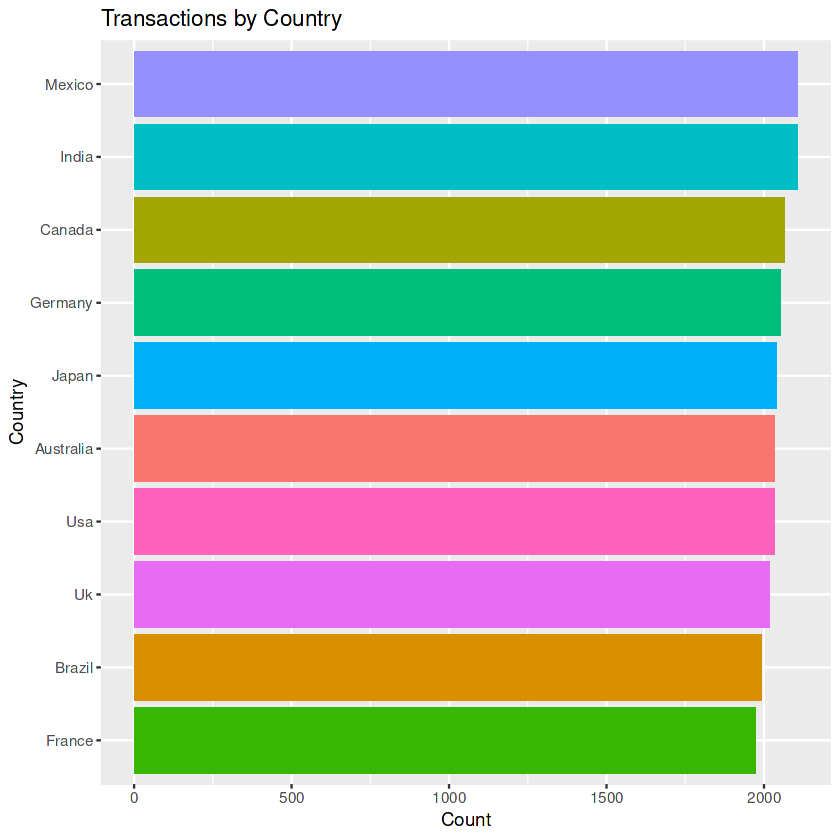

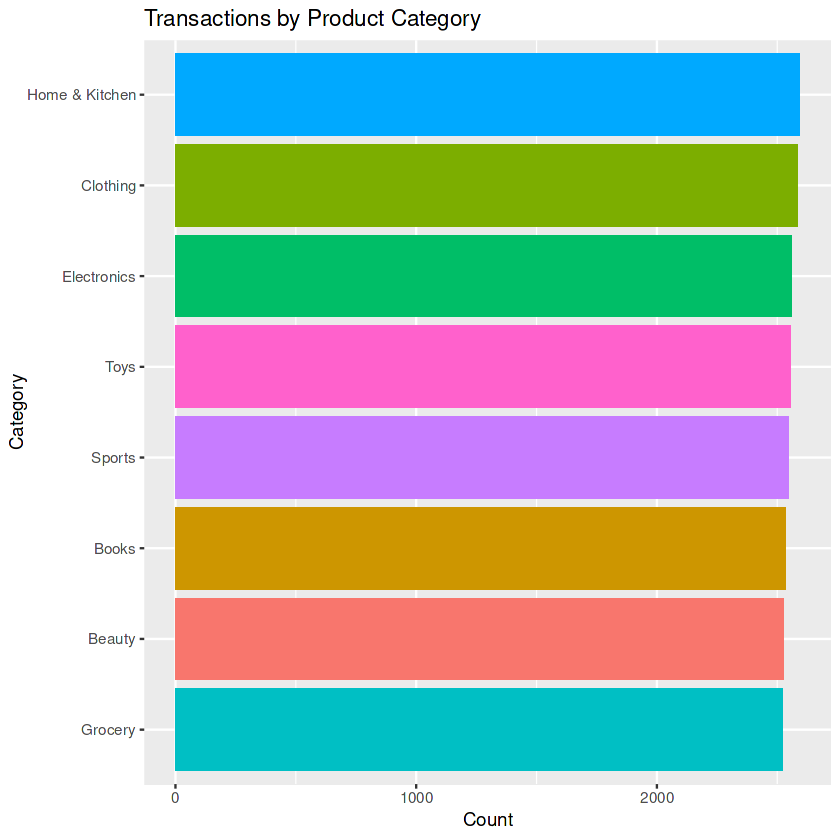

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


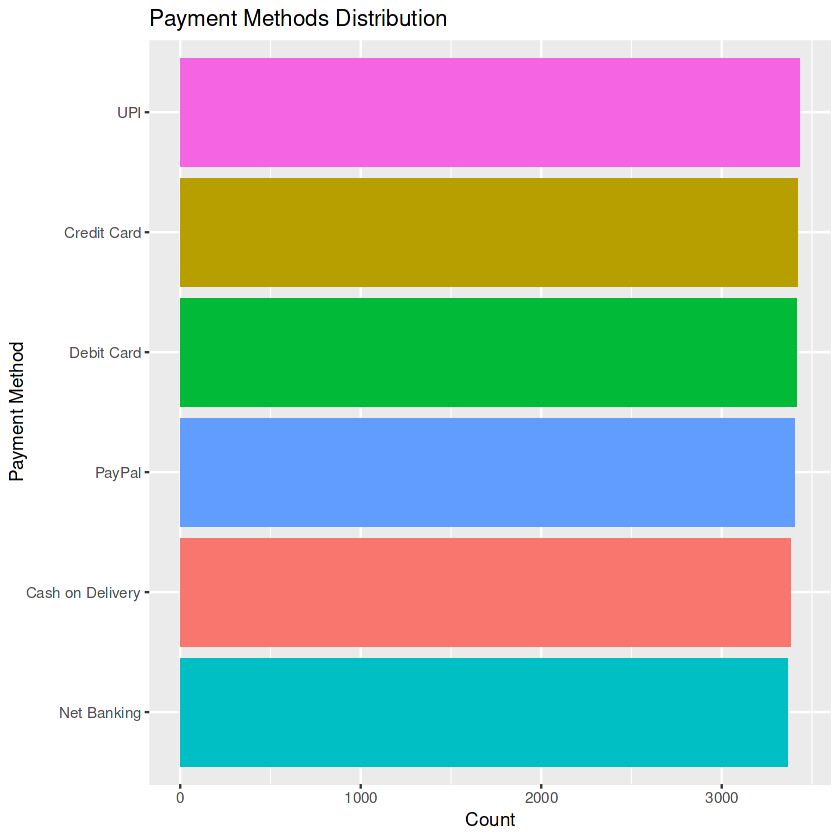

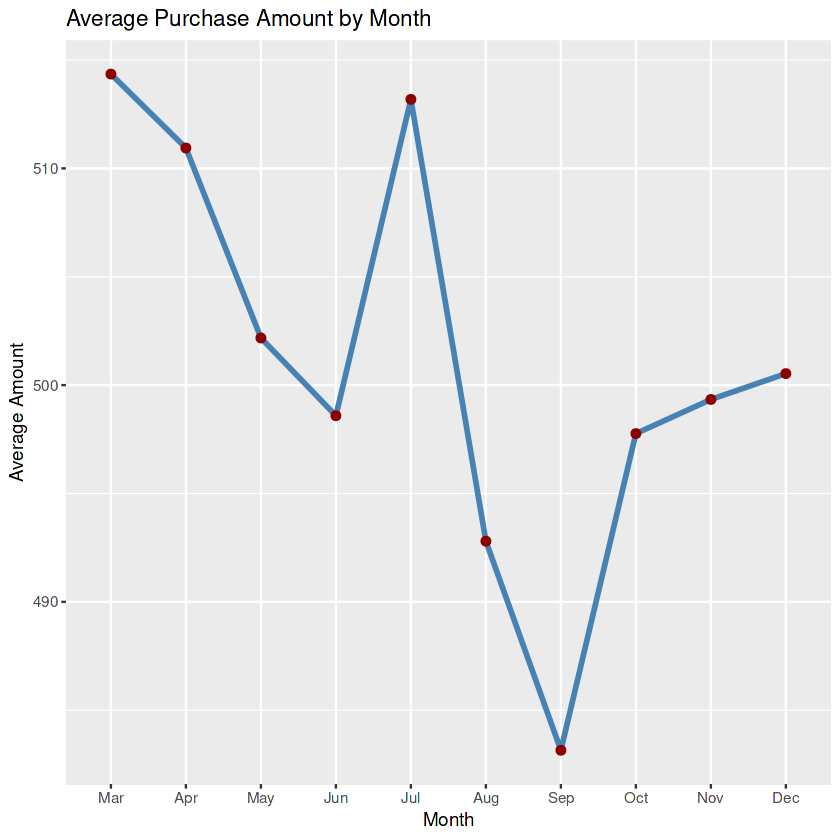

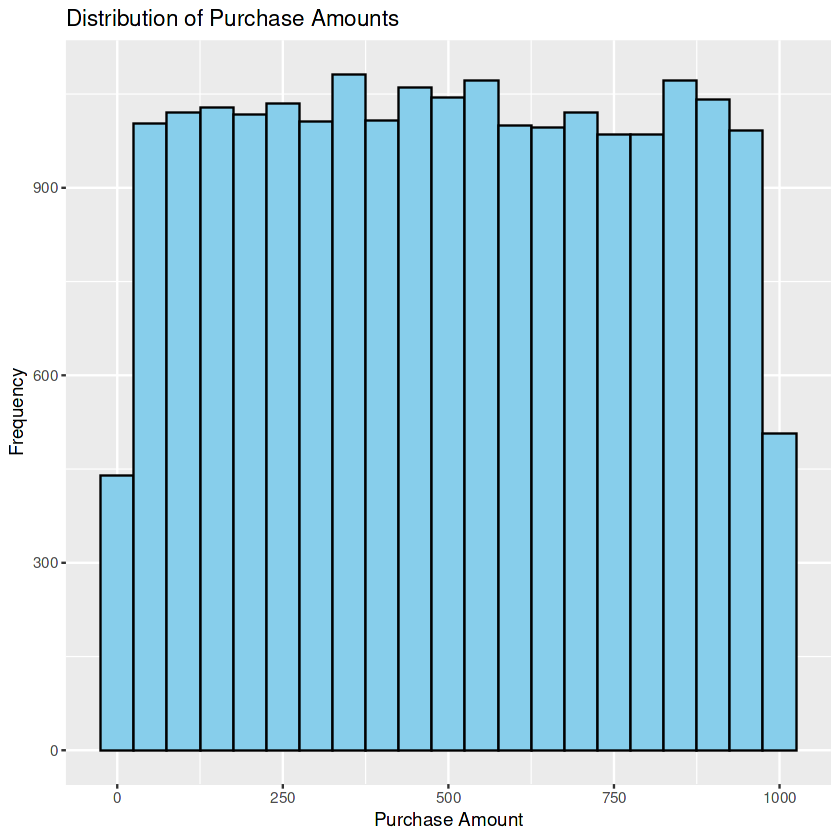

In [3]:
df %>%
  count(country, sort = TRUE) %>%
  ggplot(aes(x = reorder(country, n), y = n, fill = country)) +
  geom_col() +
  coord_flip() +
  labs(title = "Transactions by Country", x = "Country", y = "Count") +
  theme(legend.position = "none")

df %>%
  count(product_category, sort = TRUE) %>%
  ggplot(aes(x = reorder(product_category, n), y = n, fill = product_category)) +
  geom_col() +
  coord_flip() +
  labs(title = "Transactions by Product Category", x = "Category", y = "Count") +
  theme(legend.position = "none")

df %>%
  count(payment_method, sort = TRUE) %>%
  ggplot(aes(x = reorder(payment_method, n), y = n, fill = payment_method)) +
  geom_col() +
  coord_flip() +
  labs(title = "Payment Methods Distribution", x = "Payment Method", y = "Count") +
  theme(legend.position = "none")

df %>%
  mutate(month = lubridate::month(transaction_date, label = TRUE)) %>%
  group_by(month) %>%
  summarise(avg_amount = mean(purchase_amount)) %>%
  ggplot(aes(x = month, y = avg_amount, group = 1)) +
  geom_line(color = "steelblue", size = 1.2) +
  geom_point(color = "darkred", size = 2) +
  labs(title = "Average Purchase Amount by Month", x = "Month", y = "Average Amount")

ggplot(df, aes(x = purchase_amount)) +
  geom_histogram(binwidth = 50, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Purchase Amounts", x = "Purchase Amount", y = "Frequency")